In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Pre Exercise

In the google doc sheet we have 41 restaurant and 44 people. There are about 1000 rating in total. We want to do collaborative filtering with 7 hidden features.

https://docs.google.com/spreadsheets/d/143AcuFLKRLkz7yoKiEas0rABfuKPYCSlVKY1DUbFiBo/edit#gid=0

1) What is the size of matrix R?

In [2]:
[7, 41]

[7, 41]

2) What is the size of matrix P?

In [3]:
[7, 44]

[7, 44]

3) What should be the dimension of the rating matrix T? Write a numpy statement to calculate the $T$ from $R$ and $P$.

In [4]:
[41, 44]

[41, 44]

4)Import the google sheet. (export it to csv and read line by line). The google sheet and the notes has a bit different conventtion for rating matrix so be careful.

In [5]:
def read_rating():
    all_ratings = []
    all_defined = []
    
    with open('rating.csv') as f:
            lines = f.readlines()
            useful_lines = lines[3:]

            names = lines[2].split(',')[2:]
            names = map(lambda x: x.strip(), names)
            rnames = []

            for iline, line in enumerate(useful_lines):
                tokens = line.split(',')
                tokens = map(lambda x: x.strip(), tokens)

                rname = tokens[1]
                ratings = tokens[2:]

                defined = map(lambda x: 0 if (x == '' or x == '"') else 1, ratings)

                def clean_cast(x):
                    return 0 if (x == '' or x == '"') else float(x)

                ratings = map(lambda x: clean_cast(x), ratings)

                all_ratings.append(ratings)
                all_defined.append(defined)

                rnames.append(rname)

            T = np.array(all_ratings)
            H = np.array(all_defined)
            
    return T, H, names, rnames

In [6]:
T, H, names, rnames = read_rating()

In [7]:
print H

[[0 0 1 ..., 0 1 1]
 [1 0 1 ..., 0 1 1]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 1 1 1]
 [0 0 0 ..., 0 1 1]]


5) What is the dimension of rating matrix? AFTER you figure out, check it with rating.shape.

In [7]:
print T.shape

(41, 44)


6) What is the dimension of has_rating matrix? AFTER you figure out, check it with rating.shape.

In [8]:
print H.shape

(41, 44)


In [8]:
npeople = len(names)
nrest = len(rnames)
nfeature = 3

In [9]:
np.random.seed(17)
P = np.random.randn(nfeature, npeople)
R = np.random.randn(nfeature, nrest)

In [10]:
np.dot(R.T, P).shape

(41, 44)

In [11]:
def score(R, P):
    return np.sum(H * (T - np.dot(R.T, P))**2)
print score(R, P)

12330.828628


In [15]:
def find_R_P(R, P):
    l = 0.001
    
    for i in xrange(100000):
        HT = (H * (T - np.dot(R.T, P)))
        R = R + l * np.dot(P, HT.T)
        P = P + l * np.dot(R, HT)
        
        if (i%500 == 0):
            print i, score(R, P)
        
    return R, P

In [16]:
find_R_P(R, P)

0 12029.7624697
500 436.951212985
1000 396.218846916
1500 379.361691969
2000 368.205969065
2500 361.191061271
3000 356.689365414
3500 353.342465289
4000 350.416918297
4500 347.533103089
5000 344.71070379
5500 342.301070542
6000 340.578811424
6500 339.454040993
7000 338.702386323
7500 338.162089306
8000 337.738803484
8500 337.375494734
9000 337.034926689
9500 336.691987234
10000 336.330779883
10500 335.943138264
11000 335.526091662
11500 335.077410789
12000 334.590580159
12500 334.051076647
13000 333.434370498
13500 332.706096552
14000 331.831061777
14500 330.808932141
15000 329.730899597
15500 328.755971256
16000 327.975515922
16500 327.371311666
17000 326.889834801
17500 326.489232537
18000 326.14371095
18500 325.837822269
19000 325.56201375
19500 325.310106609
20000 325.077914943
20500 324.862472122
21000 324.661585047
21500 324.473569786
22000 324.297089744
22500 324.131053119
23000 323.974545753
23500 323.826785883
24000 323.687092967
24500 323.554865834
25000 323.429567127
25500 3

(array([[ -1.46861518e+00,   3.21429941e-02,   5.99210915e-01,
           3.21973353e-01,  -2.99639577e-02,   1.99387594e-02,
          -8.98143011e-01,  -5.25541344e-01,  -2.14172949e-01,
          -1.47298339e+00,  -1.36113359e-01,   3.95168718e-01,
           1.79197977e+00,  -8.81769341e-01,   5.40379435e+00,
           2.41174472e+00,   5.51129625e-01,  -4.73935976e-01,
           1.08596808e+00,  -7.50961332e-01,  -5.33064752e-01,
          -9.32705268e-04,   4.80577117e-01,   4.88124907e-01,
           3.32579732e+00,   1.76111070e+00,  -1.28284607e-01,
           6.33981907e-01,   1.43797767e-02,  -1.17336465e-01,
           2.73498027e-01,   5.12317728e-01,  -7.72433936e-01,
           7.65541087e-01,  -2.91781804e-01,  -6.52947291e+00,
          -2.94290891e-01,  -2.54923205e-01,   4.41087425e-03,
          -5.11666086e-01,  -9.38726960e-01],
        [ -1.24322355e-01,  -2.13288965e-01,   1.68361054e-02,
          -6.83642184e-01,  -3.81831962e-01,  -3.50987319e-01,
         

7)The update rule for $P$ is


$P = P - \eta\; dP$

Write down the formula for $dP$. Then, write a numpy code to calculate $dP$.

8)The update rule for $R$ is

$R = R- \eta\; dR$

Write down the formula for dR. Then, write a numpy code to calculate dR.

9) Write the numpy code to calculate the cost. (you may find np.sum useful)

# Exercise
You have given CSV file for all the rating. Now your job is to figure out what is the next restaurant you should go next using collaborative filtering with gradient descent.

The idea is to keep update matrix F and P with the update rule we find above many many times.

Debugging this is quite a pain. One way to do it is to monitor the value of the cost function making sure it is going in the right direction.

If you are doing it right this should not be more than 50 lines.

The convergence is quite slow. So try it 10k + times.

# Debugging Tip
To compare your guess rating(G*has_rating) and the actual rating graphically use

plt.matshow(rating, vmin=0, vmax=5)

 if they look almost the same then your algorithm is doing the right thing 

In [57]:
# def scale(s):
#     return (1./(1 + np.exp(-s))) * 5

Once you have F and P and guess matrix.
I wrote this so that visualizing your result is easier.

In [60]:
from IPython.display import HTML

class TableCell:
    
    def __init__(self, text, tc=None, color=None):
        self.text = text
        self.tc = tc
        self.color = color
    
    def to_html(self):
        return '<td>%s</td>'%self.text

#the rating and guess matrix has different convention from the notes so be sure to transpose it first
def maketable(rating, has_rating, guess, restaurants, names):
    n_rests = len(restaurants)
    n_names = len(names)
    tab = np.empty((n_rests+1, n_names+1),dtype='object')
#     guess = scale(guess)
    #print tab.shape

    for irest in range(n_rests):
        tab[irest+1,0] = restaurants[irest]

    for iname in range(n_names):
        tab[0,iname+1] = names[iname]

    for irest in range(n_rests):
        for iname in range(n_names):
            if not has_rating[iname, irest]:
                tab[irest+1, iname+1] = TableCell('<span style="color:red">%3.2f</span>'%(guess[iname, irest]))
            else:
                tab[irest+1, iname+1] = TableCell('<span style="color:blue">%3.2f</span><span style="color:red">(%3.2f)</span>'%(rating[iname, irest], guess[iname, irest]))
    #now convert tab array to nice html table
    nrow, ncol = tab.shape
    t = []
    t.append('<table>')
    for irow in range(nrow):
        t.append('<tr>')
        for icol in range(ncol):
            cell = tab[irow,icol]
            if cell is not None:
                if isinstance(cell,TableCell):
                    t.append(tab[irow, icol].to_html())
                else:
                    t.append('<td>')
                    t.append(tab[irow, icol])
                    t.append('</td>')
            else:
                t.append('<td></td>')
        t.append('</tr>')  
    t.append('</table>')
    return '\n'.join(t)

In [61]:
# call it like this

HTML(maketable(T.T, H.T, np.dot(R.T, P).T, rnames, names))

,Piti,Meena,Pitoon,Sohum,Sam,Keng,O,Yok,Kitty,Time,Robroo,Peem,Chanon,Ohm,Sun,Tii,Tow,John,Mint,Opal,Kelly,Jay,Sharik,Ou,PJ,Punawit,Martin,Ploy,Majeed,Bossy,Sea,Pan,Ice,Karn,May,Rin,Peter,Ham,Benz,Billy,Kanat,Sam,Boss,Best
Mai-tok-mai-tak,0.70,0.81,2.00(-0.88),-0.30,0.97,2.00(-2.07),2.00(0.90),3.00(0.75),0.30,3.00(-0.22),3.00(-1.42),5.00(0.80),0.93,3.00(0.48),2.00(-0.11),3.00(1.55),3.00(0.18),1.39,2.00(0.38),3.00(-1.11),3.00(0.80),3.00(-1.47),-0.87,2.00(0.02),0.28,-0.36,0.99,4.00(0.28),0.86,3.00(-0.51),4.00(0.35),0.75,-1.47,3.00(-0.07),4.00(0.25),-0.73,0.24,-0.12,4.00(2.31),4.00(0.97),4.00(0.37),-2.07,4.00(-0.10),5.00(-0.38)
Puttharaksa,4.00(-0.06),2.02,4.00(-0.33),4.00(-0.89),4.00(-1.60),3.00(-2.33),4.00(0.61),3.00(-0.11),-0.06,3.00(0.21),-2.09,4.00(-0.91),3.00(1.64),4.00(0.69),3.00(-0.92),4.00(1.49),4.00(-1.54),3.00(0.51),3.00(0.79),3.00(-1.09),3.00(0.65),3.00(-0.92),3.00(-0.25),3.00(0.52),2.16,0.16,0.87,3.00(-0.19),3.00(0.97),-0.03,4.00(-0.71),4.00(0.38),4.00(-0.31),0.40,4.00(-0.49),3.00(-0.89),-0.83,-0.11,1.00(1.19),4.00(1.67),3.00(1.68),-3.60,4.00(0.92),4.00(-0.85)
Big Mamma,1.43,4.00(-2.76),-1.01,5.00(1.29),5.00(5.32),1.05,0.33,1.73,4.00(0.68),-0.81,1.71,3.40,-1.68,-0.64,1.80,-0.16,3.63,1.55,-0.90,0.41,0.20,-0.87,-1.17,-1.09,-4.24,-1.07,0.07,0.94,-0.45,-0.96,2.11,0.58,-2.11,-1.09,4.00(1.43),4.00(0.49),2.24,3.00(-0.05),1.87,-1.62,-2.93,3.71,-2.28,1.31
Seefah,-1.91,2.00(0.99),4.00(1.76),4.00(-0.61),5.00(-4.95),1.83,4.00(-1.41),3.00(-2.09),-0.87,5.00(0.89),0.48,4.00(-3.48),3.00(0.11),-0.21,-1.11,4.00(-1.73),-2.81,3.00(-2.82),0.24,1.26,-1.07,2.40,4.00(1.87),2.00(0.75),2.53,4.00(1.17),-1.20,3.00(-1.02),-0.75,2.00(1.27),-1.99,-1.37,3.35,0.77,3.00(-1.42),0.54,3.00(-1.87),4.00(0.13),-4.17,4.00(0.05),1.60,-0.14,5.00(1.60),4.00(-0.24)
Music Square,2.00(-0.49),-0.22,0.32,-0.07,3.00(-0.54),4.00(0.99),-0.62,4.00(-0.23),4.00(-0.21),4.00(0.25),4.00(0.44),-0.69,-0.20,-0.40,4.00(0.08),4.00(-0.52),5.00(-0.23),-0.71,5.00(0.03),1.02,4.00(-0.21),3.00(0.63),0.34,2.00(0.04),-0.40,5.00(0.10),-0.27,3.00(-0.17),-0.42,0.15,4.00(-0.41),-0.46,0.86,4.00(-0.20),5.00(-0.42),4.00(0.28),-0.14,-0.10,-1.12,2.00(-0.14),4.00(-0.18),0.72,4.00(-0.25),3.00(0.74)
Mamma Mia,3.00(1.04),4.00(2.28),-2.69,5.00(-1.57),5.00(2.65),-4.58,4.00(1.14),4.00(2.61),0.43,4.00(0.11),5.00(-4.17),5.00(0.83),3.00(3.12),5.00(0.15),3.00(0.19),5.00(4.64),4.00(0.21),3.17,4.00(1.82),4.00(0.00),4.00(2.74),4.00(-3.85),-2.54,3.00(0.10),-1.38,3.00(-1.35),4.00(3.26),3.00(0.59),1.83,4.00(-1.82),5.00(-0.13),3.00(1.28),5.00(-2.90),4.00(-1.50),5.00(-0.70),5.00(-1.94),0.72,3.00(-1.07),3.00(5.50),5.00(3.63),3.00(0.39),-5.52,4.00(-2.06),2.13
Srijan,4.00(-1.68),-1.96,3.00(1.18),0.18,-0.75,3.00(4.84),-2.62,5.00(-0.59),-0.72,3.00(0.80),2.00(2.67),4.00(-1.90),-1.55,2.00(-1.93),2.00(0.92),2.00(-2.51),2.00(0.16),-2.72,1.00(-0.24),4.51,-0.98,2.64,1.23,3.00(-0.20),-3.03,4.00(0.15),-1.32,-0.47,3.00(-2.06),2.00(0.42),-1.09,4.00(-1.87),3.15,-1.13,3.00(-1.29),1.47,0.07,3.00(-0.37),3.00(-4.49),4.00(-1.30),3.00(-1.72),4.57,4.00(-1.71),3.00(3.48)
Steak House,-0.42,3.00(3.14),-2.63,4.00(-2.80),4.00(0.93),-3.53,-0.49,2.64,4.00(-0.23),1.17,-4.93,-1.80,4.21,-0.98,0.18,5.04,-1.22,1.00(1.89),2.94,3.33,0.00(3.24),-3.28,5.00(-2.29),3.00(0.49),-2.47,3.00(-1.40),3.79,0.09,1.33,-1.96,-2.01,3.00(0.18),-0.90,-2.61,-2.71,-1.97,3.00(0.10),2.00(-1.87),3.85,5.15,0.59,-6.37,-3.36,5.29
Anya,1.00(-1.87),4.00(0.68),4.00(-0.51),4.00(-1.77),5.00(-0.76),4.00(1.73),4.00(-2.55),4.00(0.92),4.00(-0.84),4.00(1.51),3.00(-1.06),3.00(-3.17),4.00(1.55),1.00(-2.14),4.00(0.65),1.05,-1.11,2.00(-1.31),4.00(1.75),4.00(5.81),4.00(1.17),5.00(0.29),5.00(-0.23),4.00(0.28),-3.51,-0.60,4.00(1.24),4.00(-0.47),3.00(-0.84),4.00(-0.74),-2.45,-1.54,5.00(2.37),-2.42,-2.96,-0.06,-0.18,5.00(-1.48),4.00(-1.62),5.00(2.33),3.00(-0.69),-0.63,5.00(-3.22),4.00(6.04)
Chicky Chic,2.00(0.14),3.00(0.33),2.00(1.32),2.00(0.73),0.00(-2.51),2.00(-0.35),5.00(0.95),2.00(-1.83),3.00(0.05),2.00(-0.47),5.00(0.76),4.00(0.02),2.00(-0.79),1.00(1.38),2.00(-1.17),-1.53,-1.04,0.00(-0.69),

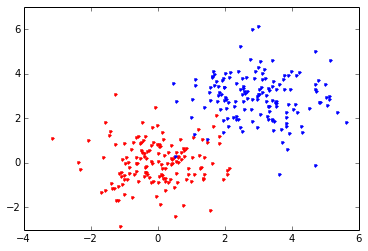

In [17]:
np.random.seed(999)
size = 300
data = np.random.randn(size,2)

data[size/2:, :] = data[size/2:, :] + [3, 3]
classes = np.zeros(size)
classes[size/2:] = 1
plt.plot(data[classes == 0, 0], data[classes == 0, 1], '.r')
plt.plot(data[classes == 1, 0], data[classes == 1, 1], '.b')

In [18]:
def kneighbor(p, data, k):
    distances = np.linalg.norm(data - p, axis = 1)
    nearest_index = np.argsort(distances)[:k]
    cls = classes[nearest_index]
    return sum(cls)/len(cls)

In [125]:
k = 3
p = np.array([1, 1])
print kneighbor(p, data, k)


0.333333333333


<matplotlib.contour.QuadContourSet instance at 0x112619170>

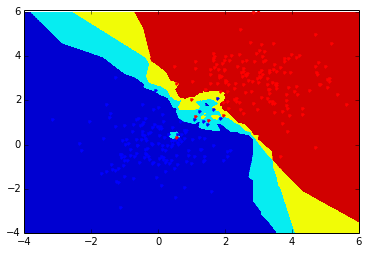

In [128]:
xs = np.linspace(-4, 6, 1000)
ys = np.linspace(-4, 6, 1000)
z = np.zeros((1000, 1000))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        z[iy, ix] = kneighbor(np.array([x, y]), data, k)
        
plt.plot(data[classes == 0, 0], data[classes == 0, 1], '.b')
plt.plot(data[classes == 1, 0], data[classes == 1, 1], '.r')
plt.contourf(xs, ys, z)